# Preprocess data

### 0. Importing libraries

In [46]:
import os
import cv2
import pandas as pd
import numpy as np
from random import randrange
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

### 1. Loading images and labels

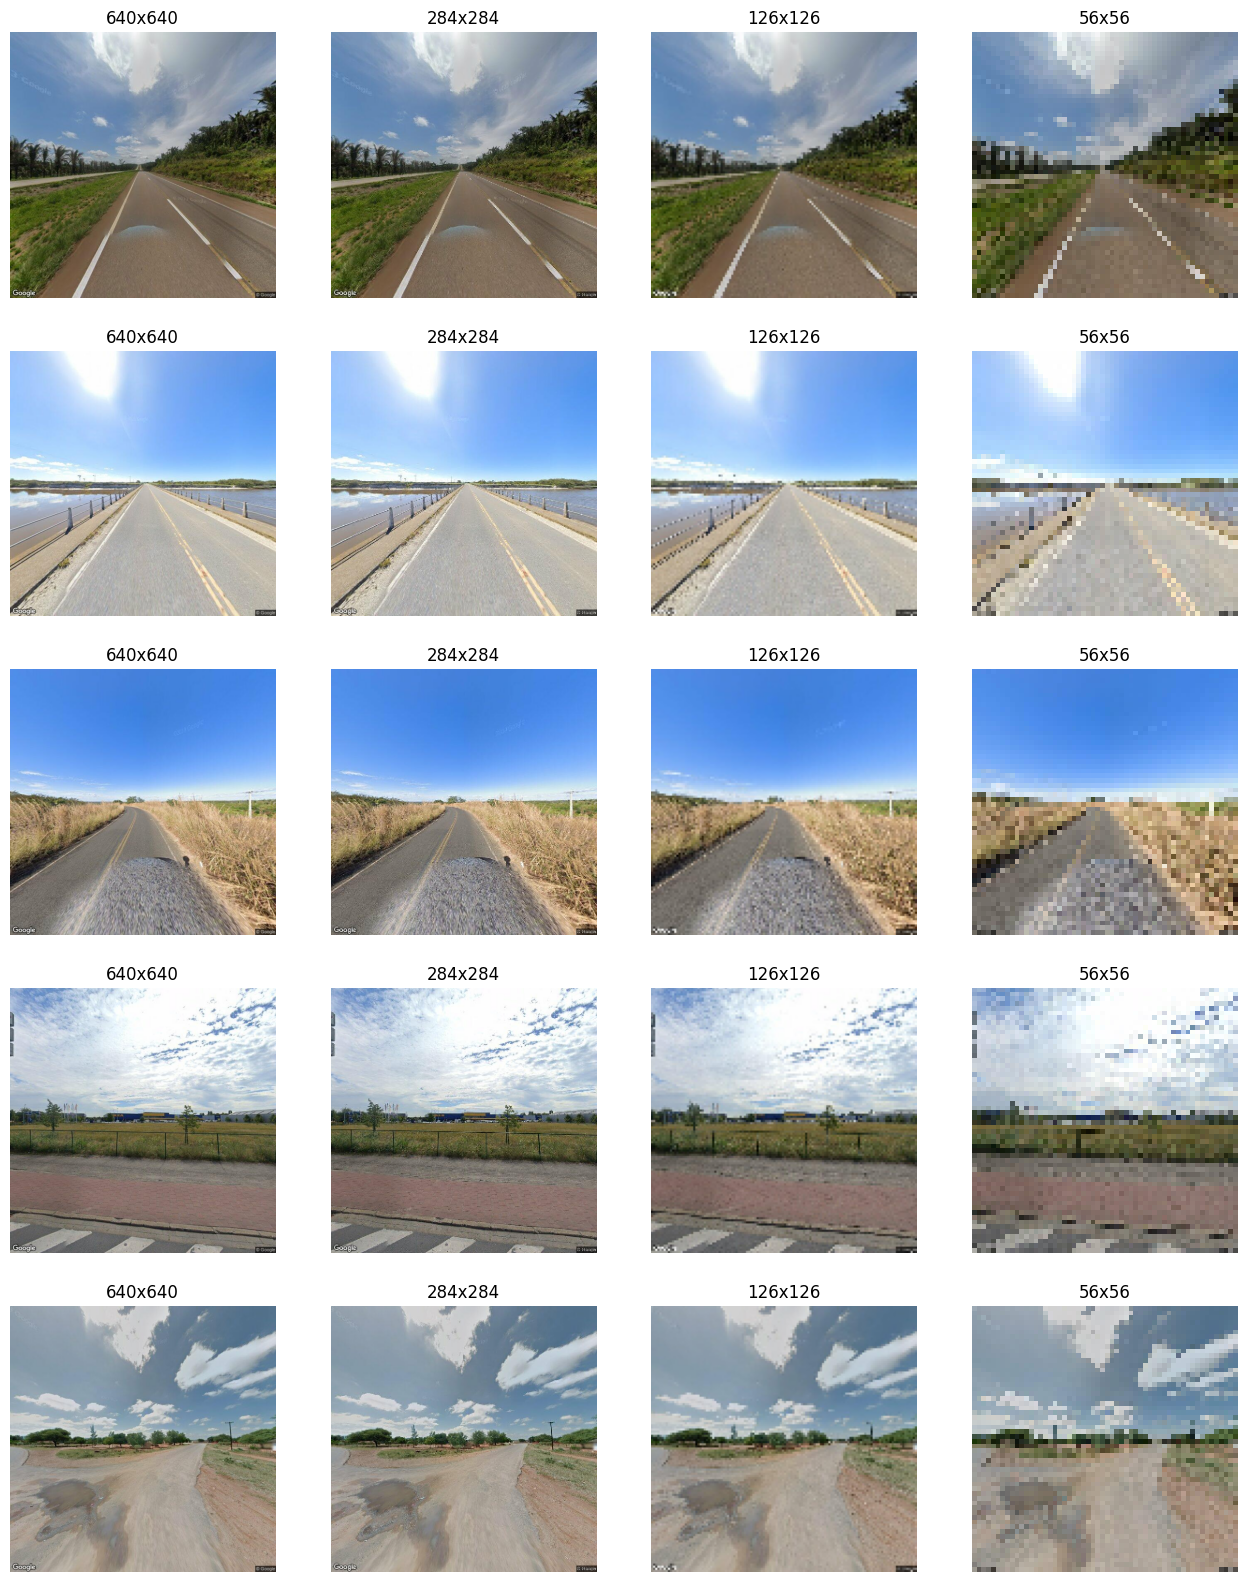

In [78]:
image_folder = '..\\Data'
labels_df = pd.read_csv('..\\coordinates_with_country.csv')
fig = plt.figure(figsize=(20,20))

ROWS = 5
COLS = 4

for i in range(ROWS):
    img_path = os.path.join(image_folder, str(labels_df['ID'][randrange(labels_df.shape[0])]) + '.png')
    img = cv2.imread(img_path)

    image_size = (640, 640)

    for j in range(COLS):
        fig.add_subplot(ROWS, COLS + 1, i*ROWS + j + 1)

        if j == 0:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else: 
            image_size = tuple(int(i / 2.25) for i in image_size)
            img_compressed = cv2.resize(img, image_size)
            plt.imshow(cv2.cvtColor(img_compressed, cv2.COLOR_BGR2RGB)) 

        plt.axis('off') 
        plt.title(f"{image_size[0]}x{image_size[1]}")

plt.show()


In [ ]:
image_size = (320, 320)
EPOCHS = 100
MAX_IMAGES = 1250

def load_images_and_labels(image_folder, labels_df, max_images = 500):
    images = []
    labels = []

    for index, row in labels_df.iterrows():
        if len(images) > max_images:
            break

        img_path = os.path.join(image_folder, str(row['ID']) + '.png')
        print(row['ID'])

        img = cv2.imread(img_path)
        img = cv2.resize(img, image_size)
        img = img / 255.0  # Normalize pixel values to [0, 1]

        images.append(img)
        labels.append(row['country'])

    return np.array(images), np.array(labels)           # return sample vector + label vector

image_folder = 'Data'
labels_df = pd.read_csv('coordinates_with_country.csv')

X, y = load_images_and_labels(image_folder, labels_df, MAX_IMAGES)